# Machine Lerning Models

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# import telecom dataset into a pandas data frame
df_telco = pd.read_csv('telco-customer-churn.csv')

In [3]:
df_telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
X = df_telco.drop("Churn",axis=1)
Y = df_telco["Churn"]

In [5]:
df_telco['TotalCharges'] = pd.to_numeric(df_telco['TotalCharges'], errors='coerce')

In [6]:
# null observations of the TotalCharges column
df_telco[df_telco['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [7]:
# drop observations with null values
df_telco.dropna(inplace=True)

In [8]:
from sklearn.metrics import mutual_info_score

In [9]:
# function that computes the mutual infomation between a categorical serie and the column Churn
def compute_mutual_information(categorical_serie):
    return mutual_info_score(categorical_serie, df_telco.Churn)

# select categorial variables excluding the response variable 
categorical_variables = df_telco.select_dtypes(include=object).drop('Churn', axis=1)

# compute the mutual information score between each categorical variable and the target
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)

# visualize feature importance
print(feature_importance)

customerID          0.579021
Contract            0.098182
OnlineSecurity      0.064528
TechSupport         0.062873
InternetService     0.055394
OnlineBackup        0.046659
PaymentMethod       0.044423
DeviceProtection    0.043784
StreamingMovies     0.031918
StreamingTV         0.031803
PaperlessBilling    0.019119
Dependents          0.014270
Partner             0.011383
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64


In [10]:
df_telco.drop(columns='customerID', inplace=True)

In [11]:

df_telco_transformed = df_telco.copy()
#Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. 
# label encoding (binary variables)
label_encoding_columns = ['gender', 'Partner', 'Dependents', 'PaperlessBilling', 'PhoneService', 'Churn']

# encode categorical binary features using label encoding
for column in label_encoding_columns:
    if column == 'gender':
        df_telco_transformed[column] = df_telco_transformed[column].map({'Female': 1, 'Male': 0})
    else: 
        df_telco_transformed[column] = df_telco_transformed[column].map({'Yes': 1, 'No': 0}) 

In [12]:
#One hot encoding is a process of converting categorical data variables so they can be provided to machine learning algorithms to improve predictions.
# one-hot encoding (categorical variables with more than two levels)
one_hot_encoding_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                            'TechSupport', 'StreamingTV',  'StreamingMovies', 'Contract', 'PaymentMethod']

# encode categorical variables with more than two levels using one-hot encoding
df_telco_transformed = pd.get_dummies(df_telco_transformed, columns = one_hot_encoding_columns)

In [13]:
#Min-max normalization is one of the most common ways to normalize data. For every feature, the minimum value of that feature gets transformed into a 0, the maximum value gets transformed into a 1
# min-max normalization (numeric variables)
min_max_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# scale numerical variables using min max scaler
for column in min_max_columns:
        # minimum value of the column
        min_column = df_telco_transformed[column].min()
        # maximum value of the column
        max_column = df_telco_transformed[column].max()
        # min max scaler
        df_telco_transformed[column] = (df_telco_transformed[column] - min_column) / (max_column - min_column) 

In [14]:
# select independent variables
X = df_telco_transformed.drop(columns='Churn')

# select dependent variables
y = df_telco_transformed.loc[:, 'Churn']

# prove that the variables were selected correctly
print(X.columns)

# prove that the variables were selected correctly
print(y.name)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit 

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# split the data in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=40, shuffle=True)

# Pre-SMOTE

# Logistic Regression

In [17]:

from sklearn.linear_model import LogisticRegression

In [18]:
Lmodel=LogisticRegression()

In [19]:
Lmodel.fit(X_train,y_train)

LogisticRegression()

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [21]:
L_P=Lmodel.predict(X_test)

In [22]:
print(classification_report(y_test,L_P))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1050
           1       0.61      0.56      0.59       357

    accuracy                           0.80      1407
   macro avg       0.73      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407



In [23]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,L_P)
cnf_matrix

array([[922, 128],
       [156, 201]])

Text(0.5, 257.44, 'Predicted label')

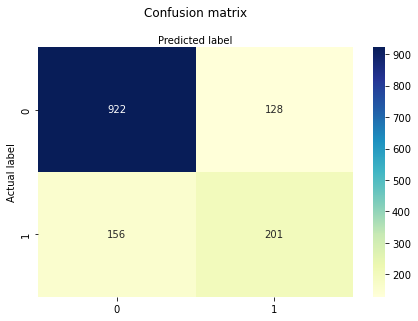

In [24]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Random Forest

In [25]:

from sklearn.ensemble import RandomForestClassifier

In [26]:
Rmodel=RandomForestClassifier()

In [27]:
Rmodel.fit(X_train,y_train)

RandomForestClassifier()

In [28]:
R_P=Rmodel.predict(X_test)


In [29]:
print(classification_report(y_test,R_P))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1050
           1       0.57      0.48      0.52       357

    accuracy                           0.77      1407
   macro avg       0.70      0.68      0.69      1407
weighted avg       0.76      0.77      0.77      1407



In [30]:
cnf_matrix = metrics.confusion_matrix(y_test,R_P)
cnf_matrix


array([[918, 132],
       [185, 172]])

Text(0.5, 257.44, 'Predicted label')

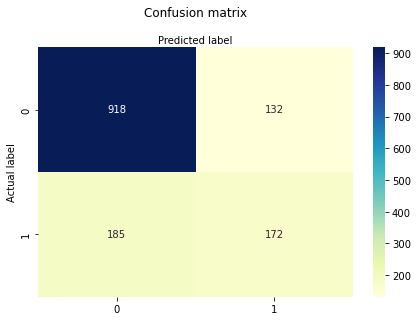

In [31]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


# XG Boost

In [32]:

import xgboost as x_g

In [33]:
from xgboost import XGBClassifier

In [34]:
x_g=XGBClassifier()

In [35]:
x_g.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [36]:
X_G=x_g.predict(X_test)

In [37]:
print(classification_report(y_test,X_G))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1050
           1       0.58      0.56      0.57       357

    accuracy                           0.78      1407
   macro avg       0.71      0.71      0.71      1407
weighted avg       0.78      0.78      0.78      1407



In [38]:
cnf_matrix = metrics.confusion_matrix(y_test, X_G)
cnf_matrix

array([[905, 145],
       [158, 199]])

Text(0.5, 257.44, 'Predicted label')

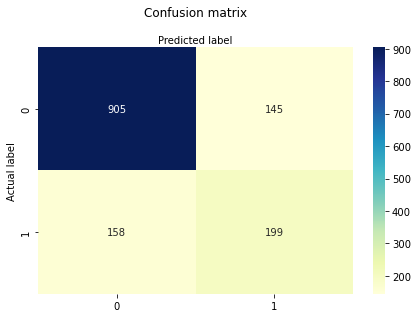

In [39]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# *NaiveBayes*

In [40]:

from sklearn.naive_bayes import GaussianNB

In [41]:
G_M = GaussianNB()

In [42]:
G_M.fit(X_train,y_train)

GaussianNB()

In [43]:
G_M=G_M.predict(X_test)

In [44]:
print(classification_report(y_test,G_M))

              precision    recall  f1-score   support

           0       0.94      0.61      0.74      1050
           1       0.44      0.88      0.58       357

    accuracy                           0.68      1407
   macro avg       0.69      0.75      0.66      1407
weighted avg       0.81      0.68      0.70      1407



In [45]:
cnf_matrix = metrics.confusion_matrix(y_test,G_M)
cnf_matrix

array([[644, 406],
       [ 43, 314]])

Text(0.5, 257.44, 'Predicted label')

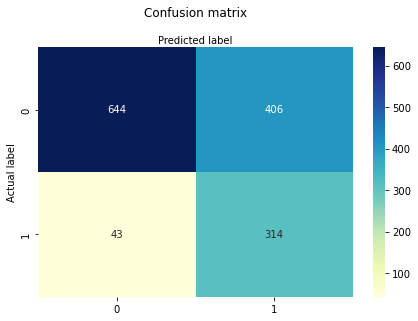

In [46]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# SMOTE TECHNIQUE

In [47]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
oversample = SMOTE()

In [50]:
X1, y1 = oversample.fit_resample(X,y)

In [51]:
X1.shape, y1.shape

((10326, 40), (10326,))

In [52]:
X_train, X_test, y_train, y_test = train_test_split( X1, y1, test_size=0.2, random_state=0)

In [53]:
from sklearn.metrics import plot_confusion_matrix

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [55]:
from sklearn.metrics import accuracy_score

# SMOTE for Random Forest

Accuracy of the Model is :  82.53
              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1006
           1       0.81      0.86      0.84      1060

    accuracy                           0.83      2066
   macro avg       0.83      0.82      0.82      2066
weighted avg       0.83      0.83      0.82      2066



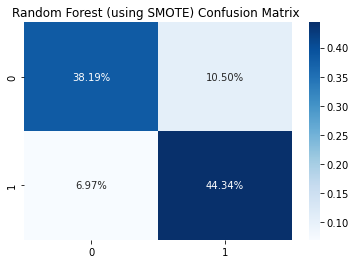

In [56]:
model_rf_smt=RandomForestClassifier(criterion = "gini",random_state = 10,max_depth=10, min_samples_leaf=5)

model_rf_smt.fit(X_train,y_train)

pred_rf_smt = model_rf_smt.predict(X_test)

rf_smt  = round(accuracy_score(y_test, pred_rf_smt)*100, 2)
print("Accuracy of the Model is : ", rf_smt)  
print(classification_report(y_test, pred_rf_smt))

cm8 = confusion_matrix(y_test, pred_rf_smt)
sns.heatmap(cm8/np.sum(cm8), annot = True, fmt=  '0.2%', cmap = 'Blues')
plt.title("Random Forest (using SMOTE) Confusion Matrix ",fontsize=12)
plt.show()

# SMOTE for Logistic Regression

Accuracy of the Model is :  84.32
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1006
           1       0.84      0.85      0.85      1060

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066



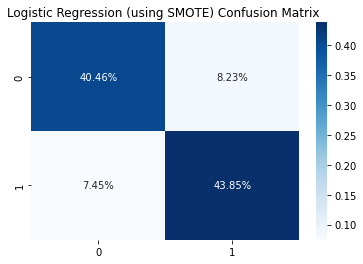

In [57]:
model_lr_smt= LogisticRegression(max_iter=2000,penalty='l2')

model_lr_smt.fit(X_train,y_train)

pred_lr_smt = model_lr_smt.predict(X_test)

lr_smt  = round(accuracy_score(y_test, pred_lr_smt)*100, 2)
print("Accuracy of the Model is : ", lr_smt)  
print(classification_report(y_test, pred_lr_smt))

cm9 = confusion_matrix(y_test, pred_lr_smt)
sns.heatmap(cm9/np.sum(cm9), annot = True, fmt=  '0.2%', cmap = 'Blues')
plt.title("Logistic Regression (using SMOTE) Confusion Matrix ",fontsize=12)
plt.show()

# SMOTE for XGBoost

Accuracy of the Model is :  84.37
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1006
           1       0.84      0.86      0.85      1060

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066



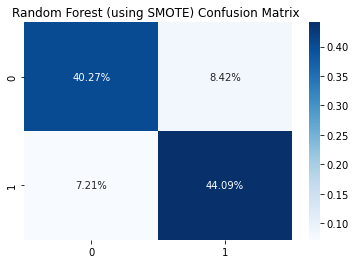

In [58]:
model_xgb_smt = XGBClassifier(random_state=1234)

model_xgb_smt.fit(X_train,y_train)

pred_xgb_smt = model_xgb_smt.predict(X_test)

xgb_smt  = round(accuracy_score(y_test, pred_xgb_smt)*100, 2)
print("Accuracy of the Model is : ", xgb_smt)  
print(classification_report(y_test, pred_xgb_smt))

cm10 = confusion_matrix(y_test, pred_xgb_smt)
sns.heatmap(cm10/np.sum(cm10), annot = True, fmt=  '0.2%', cmap = 'Blues')
plt.title("Random Forest (using SMOTE) Confusion Matrix ",fontsize=12)
plt.show()

# SMOTE for Naive Bayes

Accuracy of the Model is :  76.43
              precision    recall  f1-score   support

           0       0.82      0.66      0.73      1006
           1       0.73      0.86      0.79      1060

    accuracy                           0.76      2066
   macro avg       0.77      0.76      0.76      2066
weighted avg       0.77      0.76      0.76      2066



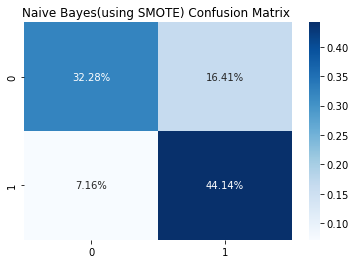

In [59]:
model_gnb_smt = GaussianNB()

model_gnb_smt.fit(X_train,y_train)

pred_gnb_smt = model_gnb_smt.predict(X_test)

gnb_smt  = round(accuracy_score(y_test, pred_gnb_smt)*100, 2)
print("Accuracy of the Model is : ", gnb_smt)  
print(classification_report(y_test, pred_gnb_smt))

cm11 = confusion_matrix(y_test, pred_gnb_smt)
sns.heatmap(cm11/np.sum(cm11), annot = True, fmt=  '0.2%', cmap = 'Blues')
plt.title("Naive Bayes(using SMOTE) Confusion Matrix ",fontsize=12)
plt.show()

# Hyperparameter Tuning Of Models

In [60]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [61]:
pip install hyperopt

Note: you may need to restart the kernel to use updated packages.


from hyperopt import hp, fmin, tpe, STATUS_OK, Trials, space_eval
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

import seaborn as sns
import scikitplot as skplt




# Tuning for Logistic Regression

In [62]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials, space_eval


In [63]:
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import time
import seaborn as sns
import scikitplot as skplt

# Tuning for RandomForest

In [64]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials, space_eval

xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, stratify = y, random_state=42, test_size=0.1)

# https://github.com/hyperopt/hyperopt/wiki/FMin

def objective(space):

    clf = RandomForestClassifier(n_estimators=space['n_estimators'],
                               max_depth = space['max_depth'],
                               min_samples_leaf = space['min_samples_leaf'],
                              min_samples_split = space['min_samples_split'])


    clf.fit(xtrain, ytrain)

    pred = clf.predict_proba(xvalid)[:,1]
    auc = roc_auc_score(yvalid, pred)
    #print("SCORE:", auc)

    return{'loss':1-auc, 'status': STATUS_OK }



space = {
    'n_estimators':hp.choice('n_estimators',range(10,500)),
    'max_depth':hp.choice('max_depth',range(4,21)),
    'min_samples_leaf':hp.choice('min_samples_leaf',range(1,6)),
    'min_samples_split':hp.choice('min_samples_split',range(2,7)),
    'class_weight':hp.choice('class_weight',[None, 'balanced', 'balanced_subsample'])
}


trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials,
            verbose = -1)

print(space_eval(space, best))

100%|██████| 100/100 [01:08<00:00,  1.47trial/s, best loss: 0.17760837410399355]
{'class_weight': 'balanced_subsample', 'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 466}


In [65]:
clf_tuned_stats_df = pd.DataFrame(columns=["clf_name", "F1-score", "auc-score", "elapsed_time"])


              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1033
           1       0.50      0.79      0.62       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.80      0.74      0.75      1407




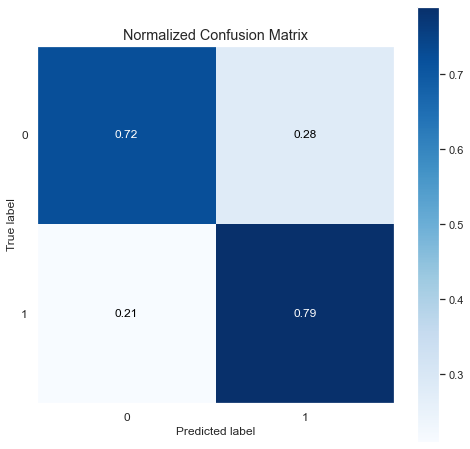

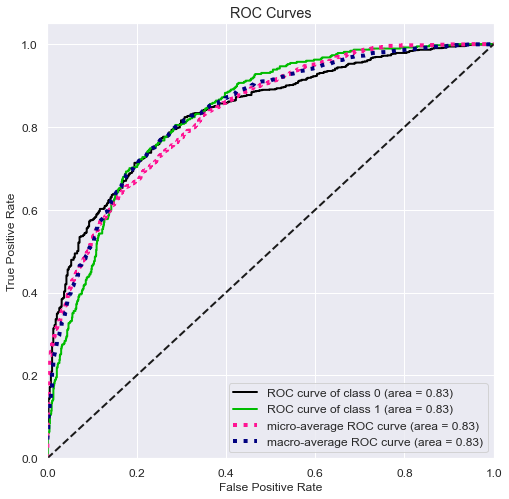

In [66]:
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import time
import seaborn as sns
import scikitplot as skplt

# create a 80/20 split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.2, stratify = y)

from sklearn.ensemble import RandomForestClassifier

start_time = time.time()

predictions_probas_list = np.zeros([len(yvalid), 2])

num_of_folds = 10
num_fold = 0


folds = StratifiedKFold(n_splits=num_of_folds, shuffle=False)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]


clf_stra_rf = RandomForestClassifier(n_estimators=space_eval(space, best)['n_estimators'],
                               max_depth = space_eval(space, best)['max_depth'],
                               min_samples_leaf = space_eval(space, best)['min_samples_leaf'],
                              min_samples_split = space_eval(space, best)['min_samples_split'],
                            class_weight = space_eval(space, best)['class_weight'],
                                         random_state=42)

clf_stra_rf.fit(xtrain_stra, ytrain_stra)

predictions = clf_stra_rf.predict(xvalid)
predictions_probas = clf_stra_rf.predict_proba(xvalid)
predictions_probas_list += predictions_probas/num_of_folds

predictions = np.argmax(predictions_probas_list, axis=1)

print()
print(classification_report(yvalid, predictions))

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions, normalize=True)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_roc(yvalid, predictions_probas)

print()

import gc
gc.collect();

# Tuning For XGboost

In [92]:
def objective(space):

    x_g= xgb.XGBClassifier(objective = 'binary:logistic',
                            booster = 'gbtree',
                            tree_method = 'exact',
                            scale_pos_weight = np.sqrt(ytrain.value_counts()[0]/ytrain.value_counts()[1]), 
                            nthread = -1,
                            seed = 42,
                            early_stopping_rounds = 100,
                            eval_metric = 'auc',
                            n_estimators = space['n_estimators'],
                            eta = space['eta'],
                            max_depth = space['max_depth'],
                            min_child_weight = space['min_child_weight'],
                            subsample = space['subsample'],
                            gamma = space['gamma'],
                            colsample_bytree = space['colsample_bytree']
                            )


In [93]:
x_g.fit(xtrain_stra, ytrain_stra, eval_set=[(xtrain_stra, ytrain_stra), (xvalid_stra, yvalid_stra)], 
                  verbose=250)

[0]	validation_0-logloss:0.56938	validation_1-logloss:0.57574
[99]	validation_0-logloss:0.20126	validation_1-logloss:0.42595


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [95]:
predictions = x_g.predict(xvalid)

In [96]:
print(classification_report(yvalid, predictions))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       517
           1       0.56      0.50      0.53       187

    accuracy                           0.76       704
   macro avg       0.69      0.68      0.69       704
weighted avg       0.76      0.76      0.76       704



# Conclusion